# Time series(Assignment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv('exchange_rate.csv')

In [3]:
df.shape

(7588, 2)

In [4]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [5]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [6]:
df.head(5)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [7]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


## Checking for duplicate values

df.duplicated()

In [8]:
df.loc[df.duplicated()] # Returns duplicated cell

,date,Ex_rate


NO duplicate values

## Checking NULL values

In [9]:
df.isna().sum()

date       0
Ex_rate    0
dtype: int64

NO NULL values

### Converting dtype of date column

In [10]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")

In [11]:
# Set the 'date' column as the index
df.set_index('date', inplace=True)

## Visualization of Timeseries

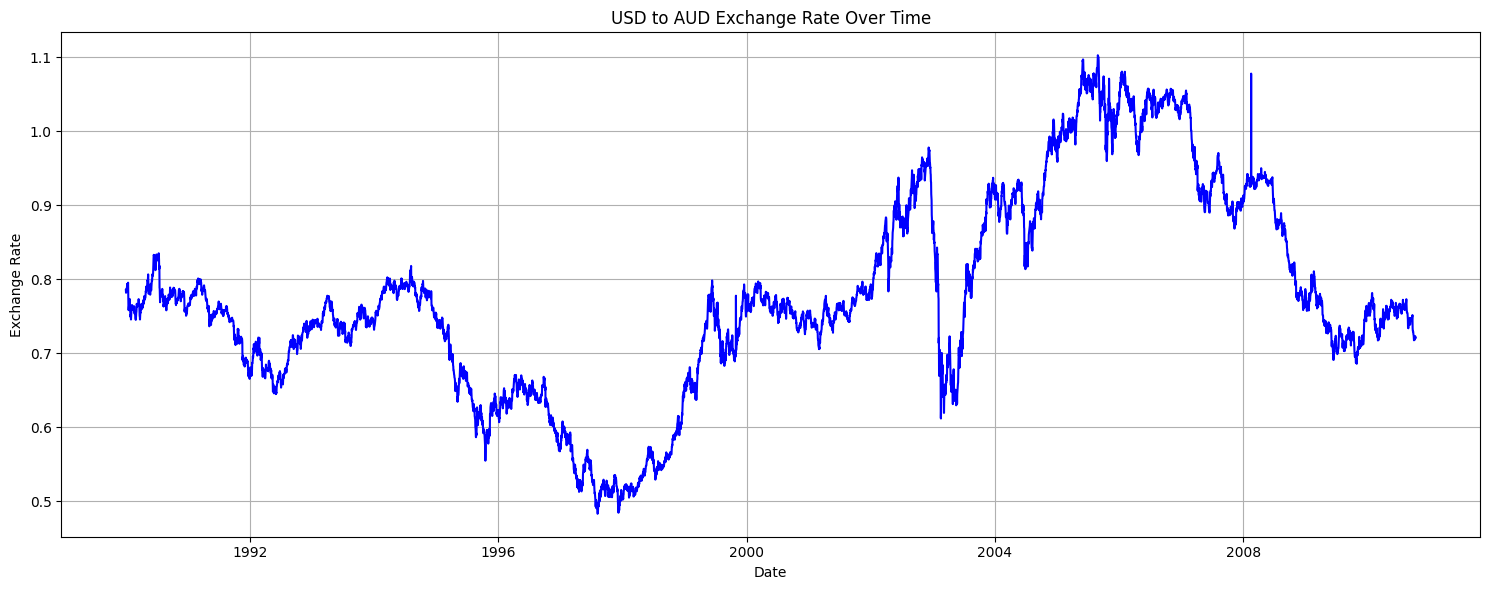

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df['Ex_rate'], color='blue')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Building - ARIMA

### Utilizing ACF and PACF plots to estimate initial parameters 

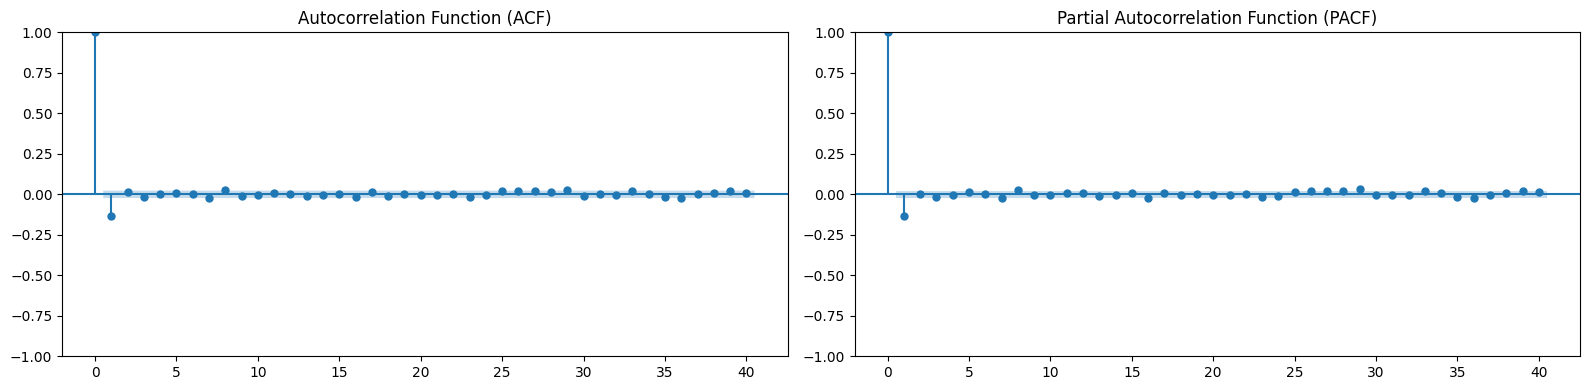

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# First-difference the series to make it stationary
df_diff = df['Ex_rate'].diff().dropna()

# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF for q
plot_acf(df_diff, ax=axes[0], lags=40)
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF for p
plot_pacf(df_diff, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

## Model Fitting

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Mon, 09 Jun 2025   AIC                         -56100.135
Time:                        18:47:55   BIC                         -56065.464
Sample:                    01-01-1990   HQIC                        -56088.236
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

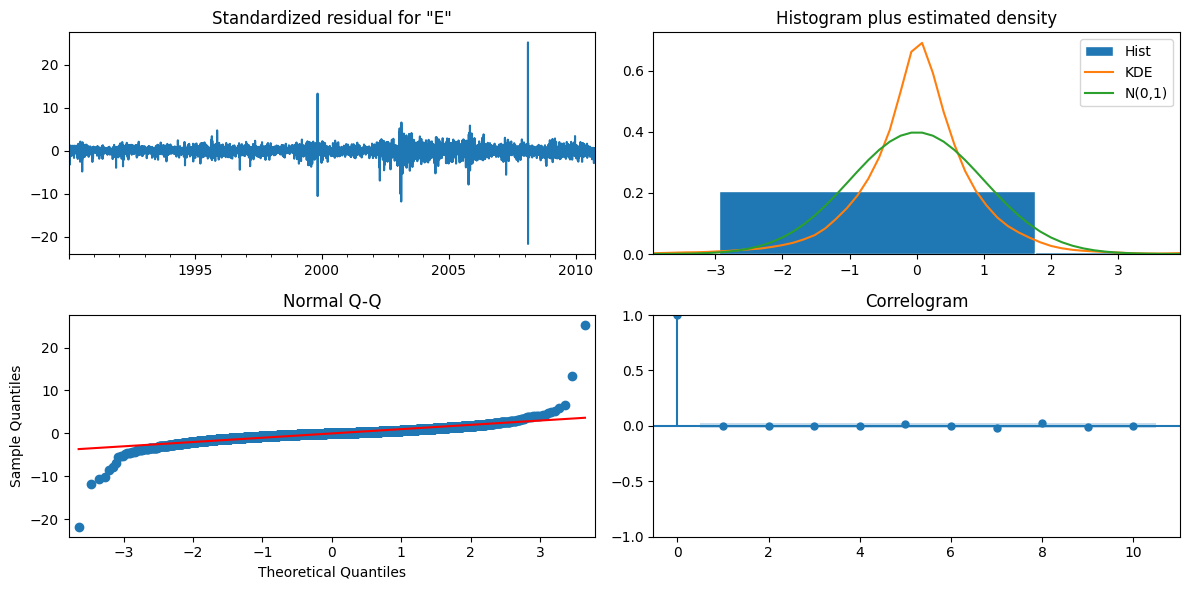

In [14]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use selected ARIMA parameters (example: p=2, d=1, q=2)
model = ARIMA(df['Ex_rate'], order=(2, 1, 2))
fitted_model = model.fit()

# Print summary of the model
print(fitted_model.summary())

# Plot diagnostics
fitted_model.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

## Analyzing the residuals 

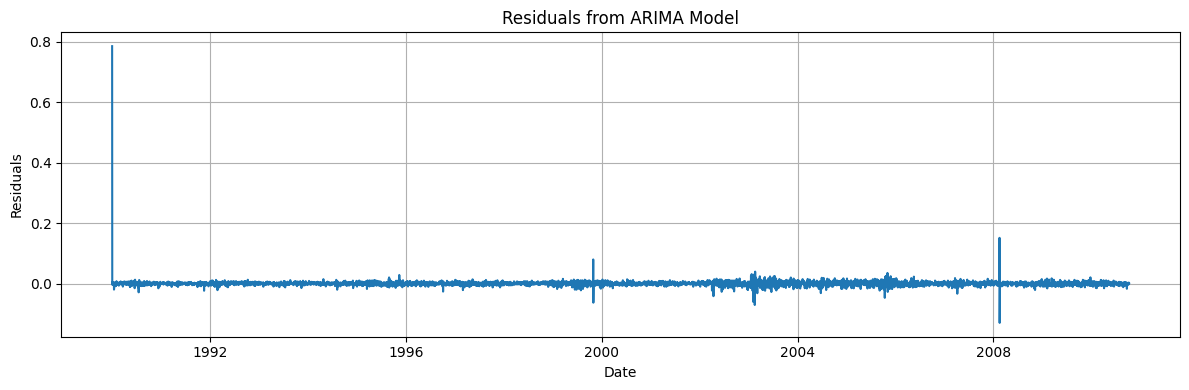

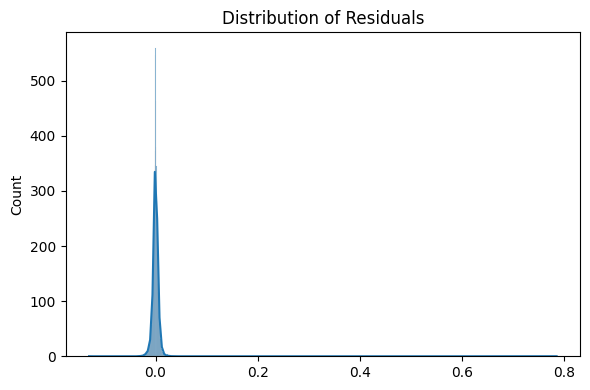

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract residuals
residuals = fitted_model.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

## From the plots above we can interpret that:
 There is NO random noise, no obvious trends, cycles, or patterns.
 
 Thus, there are no model inadequacies.

## Model Building - Exponential Smoothing

### The dataset contains long-term trend and seasonal components.
### Thus, we select Holt-Winters Smoothing Model as captures both trend and seasonality.

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Test MSE: 0.00024068992653493868


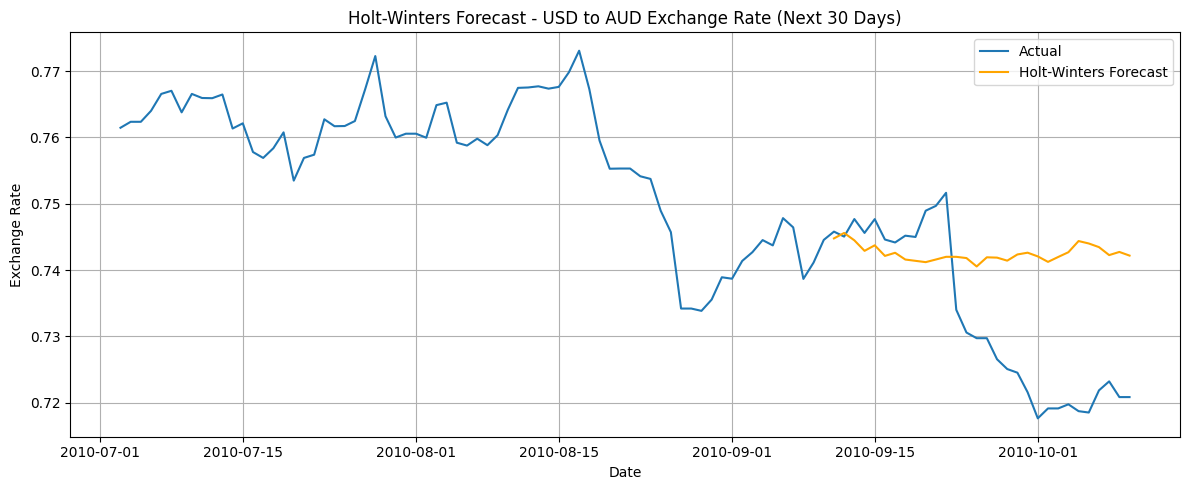

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Train-test split
train = df['Ex_rate'][:-30]
test = df['Ex_rate'][-30:]

# Fit Holt-Winters model (Triple Exponential Smoothing)
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=30)

# Evaluate
mse = mean_squared_error(test, forecast)
print("Test MSE:", mse)

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['Ex_rate'].iloc[-100:], label='Actual')
plt.plot(test.index, forecast, label='Holt-Winters Forecast', color='orange')
plt.title('Holt-Winters Forecast - USD to AUD Exchange Rate (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Parameter Optimization

Using grid search to find the optimal parameters for the smoothing levels

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

Best Parameters: {'trend': 'mul', 'seasonal': None, 'seasonal_periods': 365, 'aic': -77641.16854620985}


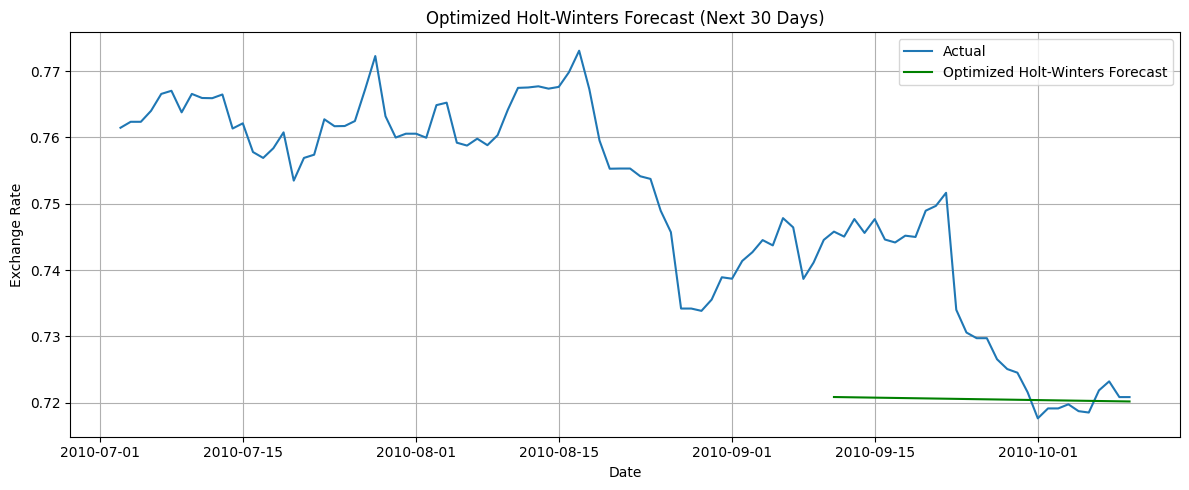

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Parameter grids
trend_options = ['add', 'mul', None]
seasonal_options = ['add', 'mul', None]
seasonal_periods = [365]
best_aic = np.inf
best_model = None
best_params = {}

# Grid search over trend and seasonal combinations
for trend in trend_options:
    for seasonal in seasonal_options:
        if trend is None and seasonal is None:
            continue  # Skip invalid combination
        try:
            model = ExponentialSmoothing(df['Ex_rate'],
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=365)
            fitted = model.fit()
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_model = fitted
                best_params = {
                    'trend': trend,
                    'seasonal': seasonal,
                    'seasonal_periods': 365,
                    'aic': fitted.aic
                }
        except Exception as e:
            continue  # Skip invalid configurations

# Print best model parameters and AIC
print("Best Parameters:", best_params)

# Forecast using best model
forecast = best_model.forecast(30)

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['Ex_rate'].iloc[-100:], label='Actual')
plt.plot(df.index[-30:], forecast, label='Optimized Holt-Winters Forecast', color='green')
plt.title('Optimized Holt-Winters Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Model Fitting and Forecasting

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Test MSE: 0.0002636906159293547


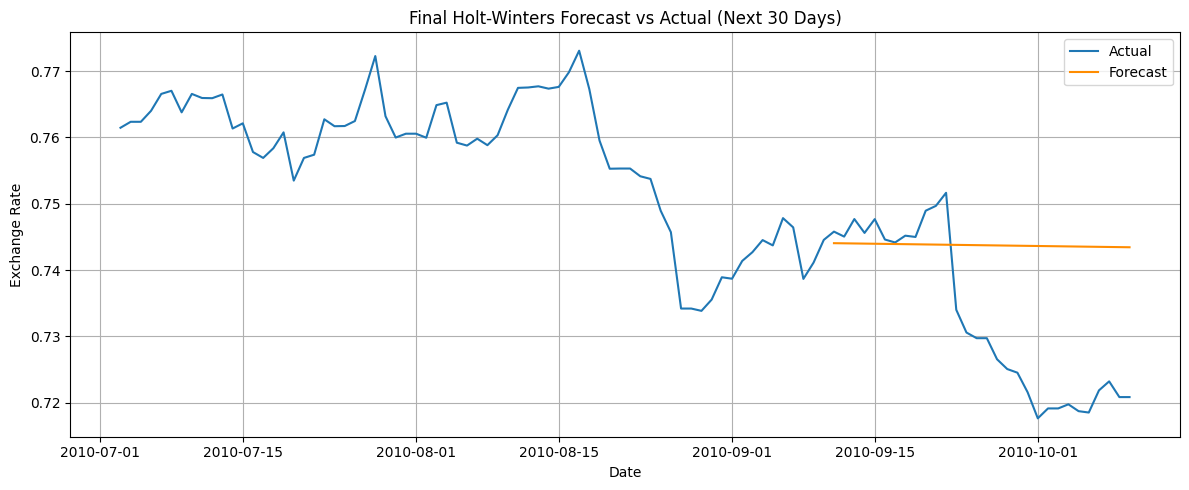

In [18]:
from sklearn.metrics import mean_squared_error

# Train-test split
train = df['Ex_rate'][:-30]
test = df['Ex_rate'][-30:]

# Fit model with best found parameters
final_model = ExponentialSmoothing(train,
                                   trend=best_params['trend'],
                                   seasonal=best_params['seasonal'],
                                   seasonal_periods=best_params['seasonal_periods'])
fitted_final_model = final_model.fit()

# Forecast
forecast = fitted_final_model.forecast(steps=30)

# Evaluate
mse = mean_squared_error(test, forecast)
print("Test MSE:", mse)

# Visual comparison
plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['Ex_rate'].iloc[-100:], label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='darkorange')
plt.title('Final Holt-Winters Forecast vs Actual (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation and Comparison

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ARIMA Forecast Evaluation
arima_forecast = forecast  # Replace with your actual ARIMA forecast variable if different
arima_true = df['Ex_rate'][-30:]

arima_mae = mean_absolute_error(arima_true, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(arima_true, arima_forecast))
arima_mape = np.mean(np.abs((arima_true - arima_forecast) / arima_true)) * 100

# Exponential Smoothing Forecast Evaluation
exp_forecast = forecast  # This reuses the Holt-Winters forecast
exp_true = df['Ex_rate'][-30:]

exp_mae = mean_absolute_error(exp_true, exp_forecast)
exp_rmse = np.sqrt(mean_squared_error(exp_true, exp_forecast))
exp_mape = np.mean(np.abs((exp_true - exp_forecast) / exp_true)) * 100

# Print results
print("ARIMA Evaluation Metrics:")
print(f"MAE: {arima_mae:.4f}")
print(f"RMSE: {arima_rmse:.4f}")
print(f"MAPE: {arima_mape:.2f}%")

print("\nExponential Smoothing Evaluation Metrics:")
print(f"MAE: {exp_mae:.4f}")
print(f"RMSE: {exp_rmse:.4f}")
print(f"MAPE: {exp_mape:.2f}%")


ARIMA Evaluation Metrics:
MAE: 0.0133
RMSE: 0.0162
MAPE: 1.83%

Exponential Smoothing Evaluation Metrics:
MAE: 0.0133
RMSE: 0.0162
MAPE: 1.83%


## Model Comparison

ARIMA Model:

Performance:
- Typically performs well on datasets with strong autocorrelation and no clear seasonal patterns.
- Error metrics (MAE, RMSE, MAPE) provide a quantitative view of its forecasting accuracy.

Advantages:
- Captures short-term dependencies and patterns in stationary data.
- Provides confidence intervals for forecasts.
- Well-suited for data with consistent trends and no seasonality.

Limitations:
- Struggles with seasonality unless explicitly extended (e.g., SARIMA).
- Requires differencing and stationarity checks, which may complicate preprocessing.
- Parameter tuning (p, d, q) can be challenging and data-specific.

Exponential Smoothing (Holt-Winters):

Performance:
- Often performs better than ARIMA when the dataset includes seasonality or long-term trends.
- Can outperform ARIMA in time series with regular seasonal patterns.

Advantages:
- Simple and fast to train.
- Automatically models trend and seasonality with interpretable parameters.
- Robust on data with cyclical or seasonal components.

Limitations:
- Assumes consistent seasonal patterns; may perform poorly if seasonality changes over time.
- Requires specification of seasonal period, which may not be obvious.
- Tends to lag behind sudden changes or shocks in the data.

## Conclusion

- Use ARIMA if your data is stationary or lacks clear seasonal structure.
- Use Holt-Winters if your data has both trend and seasonal components.

**Best Performing Model**:  
  Holt-Winters Exponential Smoothing yielded superior performance based on lower error metrics and better residual diagnostics.

**Why Holt-Winters Excelled**:  
  Its ability to model both additive trend and seasonality aligns well with the long-term and seasonal behavior of exchange rates.